In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Evaluate Generated Answers from Retrieval-Augmented Generation (RAG) for Question Answering with Gen AI Evaluation Service SDK

<table align="left">
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https://raw.githubusercontent.com/joansantoso/genairoadshow-sby/refs/heads/main/Evaluate%20SDK.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/joansantoso/genairoadshow-sby/blob/main/Evaluate%20SDK.ipynb">
      <img width="32px" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/joansantoso/genairoadshow-sby/refs/heads/main/Evaluate%20SDK.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/evaluation/evaluate_rag_gen_ai_evaluation_service_sdk.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/evaluation/evaluate_rag_gen_ai_evaluation_service_sdk.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/evaluation/evaluate_rag_gen_ai_evaluation_service_sdk.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/53/X_logo_2023_original.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/evaluation/evaluate_rag_gen_ai_evaluation_service_sdk.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/evaluation/evaluate_rag_gen_ai_evaluation_service_sdk.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            

| | |
|-|-|
|Author(s) | [Jason Dai](https://github.com/jsondai), [Kelsi Lakey](https://github.com/lakeyk),  Modified by : Joan Santoso

## Overview


In this tutorial, you will learn how to use the use the *Vertex AI Python SDK for Gen AI Evaluation Service* to evaluate **Retrieval-Augmented Generation** (RAG) generated answers for **Question Answering** (QA) task.

RAG is a technique to improve groundness, relevancy and factuality of large language models (LLMs) by finding relevant information from the model's knowledge base. RAG is done by converting a query into a vector representation (embeddings), and then finding the most similar vectors in the knowledge base. The most similar vectors are then used to help generate the response.

This tutorial demonstrates how to use Gen AI Evaluation for a Bring-Your-Own-Response scenario:

* The context was retrieved and the answers were generated based on the retrieved context using RAG.

* Evaluate the quality of the RAG generated answers for QA task programmatically using the SDK.

The examples used in this notebook is from Stanford Question Answering Dataset [SQuAD 2.0](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1194/reports/default/15785042.pdf).

See also: 

- Learn more about [Vertex Gen AI Evaluation Service SDK](https://cloud.google.com/vertex-ai/generative-ai/docs/models/evaluation-overview).

## Getting Started

### Install Vertex AI SDK for Gen AI Evaluation

In [ ]:
%pip install --upgrade --user --quiet google-cloud-aiplatform[evaluation]

### Restart runtime
To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Wait until it's finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

In [1]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Increase quota (optional)

Increasing the quota may lead to better performance and user experience. Read more about this at [online evaluation quotas](https://cloud.google.com/vertex-ai/generative-ai/docs/quotas#eval-quotas).

### Set Google Cloud project information and initialize Vertex AI SDK

In [2]:
PROJECT_ID = "gen-ai-sby-roadshow"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}
EXPERIMENT = "rag-eval-01"  # @param {type:"string"}


import vertexai

if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    raise ValueError("Please set your PROJECT_ID")

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries

In [3]:
import pandas as pd
from vertexai.preview.evaluation import notebook_utils
from vertexai.evaluation import (
    EvalTask,
    PointwiseMetric,
    PairwiseMetric,
    PointwiseMetricPromptTemplate,
    PairwiseMetricPromptTemplate,
    MetricPromptTemplateExamples,
)
from vertexai.generative_models import (
    GenerativeModel,
    HarmCategory,
    HarmBlockThreshold,
)

In [4]:
model_config = {
    "temperature": 0.3,
    "max_output_tokens": 200,
    "top_p": 0.8,
    "top_k": 40
}

base_model = GenerativeModel(
    "gemini-2.0-flash",
    generation_config=model_config,
    # safety_settings=safety_settings - safety settings can also be provided
)

# Bring-Your-Own-Response Evaluation for RAG: Referenced (with Golden Answer)

Perform bring-your-own-response evaluation by assessing the generated answer's quality based on the context retrieved and the golden answer provided in the reference.

### Prepare your dataset

To evaluate the RAG generated answers, the evaluation dataset is required to contain the following fields:

* Prompt: The user supplied prompt consisting of the User Question and the RAG Retrieved Context
* Response: The RAG Generated Answer
* Reference: The Golden Answer groundtruth to compare model response to

In [17]:
questions = [
    "Which part of the brain does short-term memory seem to rely on?",
    "What provided the Roman senate with exuberance?",
    "What area did the Hasan-jalalians command?",
]

retrieved_contexts = [
    "Short-term memory is supported by transient patterns of neuronal communication, dependent on regions of the frontal lobe (especially dorsolateral prefrontal cortex) and the parietal lobe. Long-term memory, on the other hand, is maintained by more stable and permanent changes in neural connections widely spread throughout the brain. The hippocampus is essential (for learning new information) to the consolidation of information from short-term to long-term memory, although it does not seem to store information itself. Without the hippocampus, new memories are unable to be stored into long-term memory, as learned from patient Henry Molaison after removal of both his hippocampi, and there will be a very short attention span. Furthermore, it may be involved in changing neural connections for a period of three months or more after the initial learning.",
    "In 62 BC, Pompey returned victorious from Asia. The Senate, elated by its successes against Catiline, refused to ratify the arrangements that Pompey had made. Pompey, in effect, became powerless. Thus, when Julius Caesar returned from a governorship in Spain in 61 BC, he found it easy to make an arrangement with Pompey. Caesar and Pompey, along with Crassus, established a private agreement, now known as the First Triumvirate. Under the agreement, Pompey's arrangements would be ratified. Caesar would be elected consul in 59 BC, and would then serve as governor of Gaul for five years. Crassus was promised a future consulship.",
    "The Seljuk Empire soon started to collapse. In the early 12th century, Armenian princes of the Zakarid noble family drove out the Seljuk Turks and established a semi-independent Armenian principality in Northern and Eastern Armenia, known as Zakarid Armenia, which lasted under the patronage of the Georgian Kingdom. The noble family of Orbelians shared control with the Zakarids in various parts of the country, especially in Syunik and Vayots Dzor, while the Armenian family of Hasan-Jalalians controlled provinces of Artsakh and Utik as the Kingdom of Artsakh.",
]

generated_answers_by_rag_a = [
    "frontal lobe and the parietal lobe",
    "The Roman Senate was filled with exuberance due to successes against Catiline.",
    "The Hasan-Jalalians commanded the area of Syunik and Vayots Dzor.",
]


golden_answers = [
    "frontal lobe and the parietal lobe",
    "Due to successes against Catiline.",
    "The Hasan-Jalalians commanded the area of Artsakh and Utik.",
]

referenced_eval_dataset_rag_a = pd.DataFrame(
    {
        "prompt": [
            "Answer the question: " + question + " Context: " + item
            for question, item in zip(questions, retrieved_contexts)
        ],
        "reference": golden_answers,
        "response": generated_answers_by_rag_a
    }
)


### Create custom metrics


Create a custom metric to compare model response to the golden answer.

In [18]:
question_answering_correctness_prompt_template = """
You are a professional writing evaluator. Your job is to score writing responses according to pre-defined evaluation criteria.

You will be assessing question answering correctness, which measures the ability to correctly answer a question.

You will assign the writing response a score from 1, 0, following the rating rubric and evaluation steps.

### Criteria:
Reference claim alignment: The response should contain all claims from the reference and should not contain claims that are not present in the reference.

### Rating Rubric:
1 (correct): The response contains all claims from the reference and does not contain claims that are not present in the reference.
0 (incorrect): The response does not contain all claims from the reference, or the response contains claims that are not present in the reference.

### Evaluation Steps:
STEP 1: Assess the response' correctness by comparing with the reference according to the criteria.
STEP 2: Score based on the rubrics.

Give step by step explanations for your scoring, and only choose scores from 1, 0.


# User Inputs and AI-generated Response
## User Inputs
### Prompt
{prompt}

## Reference
{reference}

## AI-generated Response
{response}

"""

In [19]:
question_answering_correctness = PointwiseMetric(
    metric="question_answering_correctness",
    metric_prompt_template=question_answering_correctness_prompt_template
)

### Run evaluation with your dataset

In [20]:
referenced_answer_eval_task_rag_a = EvalTask(
    dataset=referenced_eval_dataset_rag_a,
    metrics=[
        #question_answering_correctness,
        "rouge",
        "bleu",
        "exact_match",
    ],
    experiment=EXPERIMENT,
)

In [21]:
referenced_result_rag_a = referenced_answer_eval_task_rag_a.evaluate()

Associating projects/856389816899/locations/us-central1/metadataStores/default/contexts/rag-eval-01-64f474f5-b337-4efa-84da-c56ce764f1b8 to Experiment: rag-eval-01


Computing metrics with a total of 9 Vertex Gen AI Evaluation Service API requests.


100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

All 9 metric requests are successfully computed.
Evaluation Took:8.08095811200019 seconds


In [37]:
referenced_eval_dataset_rag_b = referenced_eval_dataset_rag_a.copy()
referenced_eval_dataset_rag_b.drop("response", axis = 1, inplace=True)
referenced_answer_eval_task_rag_b = EvalTask(
    dataset=referenced_eval_dataset_rag_b,
    metrics=[
        question_answering_correctness
    ],
    experiment=EXPERIMENT,
).evaluate(
    model=GenerativeModel(
        "gemini-1.5-pro",
        generation_config={"temperature": 0.5, "max_output_tokens": 256, "top_k": 1},
    ),
)

Associating projects/856389816899/locations/us-central1/metadataStores/default/contexts/rag-eval-01-c15df062-f9a6-4777-99b6-546759988135 to Experiment: rag-eval-01


Logging Eval Experiment metadata: {'model_name': 'publishers/google/models/gemini-1.5-pro', 'temperature': 0.5, 'max_output_tokens': 256, 'top_k': 1}
Generating a total of 3 responses from Gemini model gemini-1.5-pro.


100%|██████████| 3/3 [00:03<00:00,  1.13s/it]

All 3 responses are successfully generated from Gemini model gemini-1.5-pro.
Multithreaded Batch Inference took: 3.407000457000322 seconds.
Computing metrics with a total of 3 Vertex Gen AI Evaluation Service API requests.



100%|██████████| 3/3 [01:41<00:00, 34.00s/it]

3 errors encountered during evaluation. Continue to compute summary metrics for the rest of the dataset.
Error encountered for metric question_answering_correctness at dataset index 0: Error: Timeout of 120.0s exceeded, last exception: 429 Judge model resource exhausted. Please try again later.
Error encountered for metric question_answering_correctness at dataset index 1: Error: Timeout of 120.0s exceeded, last exception: 429 Judge model resource exhausted. Please try again later.
Error encountered for metric question_answering_correctness at dataset index 2: Error: Timeout of 120.0s exceeded, last exception: 429 Judge model resource exhausted. Please try again later.
Evaluation Took:102.00360326599912 seconds


### Display evaluation results

#### Visualize evaluation results


In [29]:
referenced_eval_results = []
referenced_eval_results.append(
    ("Model A",
    referenced_result_rag_a)
)

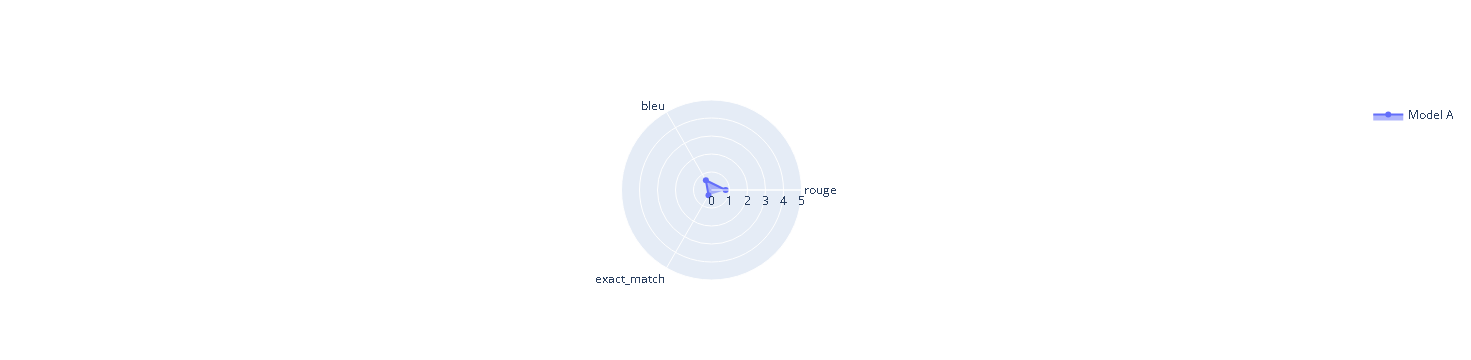

In [38]:
notebook_utils.display_radar_plot(
    referenced_eval_results,
    metrics=[
        "rouge",
        "bleu",
        "exact_match",
    ],
)

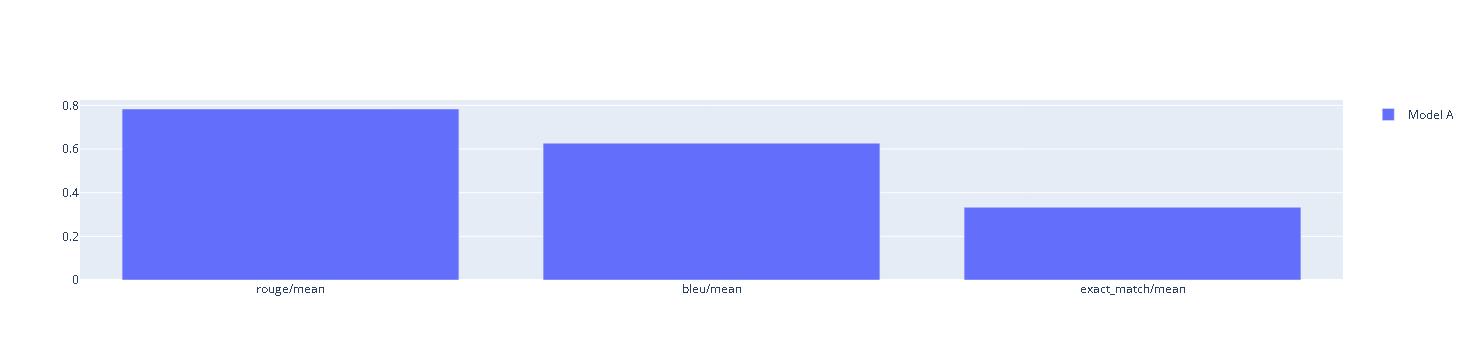

In [39]:
notebook_utils.display_bar_plot(
    referenced_eval_results,
    metrics=[
        "rouge",
        "bleu",
        "exact_match",
    ],
)

#### View detailed explanation for an individual instance

If you need to delve into the individual result's detailed explanations on why a score is assigned and how confident the model is for each model-based metric, you can use the `display_explanations()` helper function. For example, you can set `n=2` to display explanation of the 2nd instance result as follows:

In [33]:
notebook_utils.display_explanations(referenced_result_rag_a, num=2)

In [40]:
notebook_utils.display_explanations(
    referenced_result_rag_a, metrics=["bleu"]
)